In [1]:
from readin import *

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

In [2]:
from math import log, log2, log10

In [3]:
###For now, just use the one automatically
ms3data = readin_log("proteinGroups_MS3_simplified.txt")

C:\Users\M McCown\Jupyter\readin.py:105: RuntimeWarning: divide by zero encountered in log
  dfl = (np.log(df)).replace(-np.inf, 0)


# Standard Deviation Within Technical Replicates

In [4]:
technical_replicates = {
    "Cell Line 1":[0,1,2],
    "Cell Line 2":[3,4,5],
#    "Cell Line 3":[6,8],
    
#    "Cell Line 4":[10,11,12],
#    "Cell Line 5":[13,14,15],
#    "Cell Line 6":[16,18]
}#""" #For MS3
"""technical_replicates = {
    "Cell line 1 Slavov":[0,1,4],
    "Cell line 2 Slavov":[2,3,7],
#    "Cell line measurements 9&10":[8,9]
} #""" #As best I can figure for Slavov

technical_standard_deviations = []
for sample in technical_replicates:
    #
    reps = {}
    for rep in technical_replicates[sample]:
        reps[ms3data.iloc[:,rep].name] = ms3data.iloc[:,rep]
    
    #for each protein...
    for r in range(0, len(list(reps.values())[0])):
        rep_for_protein = []
        p = ms3data.iloc[r].name
        for rep in reps.values():
            if rep[r] > 0: rep_for_protein.append(rep[r])
        if len(rep_for_protein) > 1: 
            v = stdev(rep_for_protein)
            technical_standard_deviations.append((sample, p, v))
        else: 
            technical_standard_deviations.append((sample, p, 0))
            

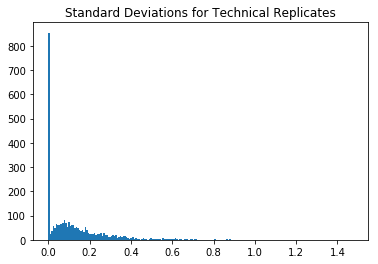

In [5]:
#plot tecnical replicate standard deviations as histogram
plt.hist([x[2] for x in technical_standard_deviations], bins=200)
plt.title("Standard Deviations for Technical Replicates")
plt.show()

In [6]:
threshold = get_thresholds([x[2] for x in technical_standard_deviations])

Including Zeros: 
95% threshold:  0.43145872157777587
99% threshold:  0.6859932025377378

Ignoring Zeros: 
95% threshold:  0.5046901704498495
99% threshold:  0.7123170284843734


In [7]:
technical_standard_deviations.sort(key=operator.itemgetter(2),reverse=True)
thresh_item = technical_standard_deviations[math.ceil(float(len(technical_standard_deviations))*.01)]


rep_for_protein = []
for rep in technical_replicates[thresh_item[0]]:
    rep_for_protein.append(ms3data.iloc[:,rep][thresh_item[1]])

rep_min = min(rep_for_protein)
rep_max = max(rep_for_protein)
((rep_max)/rep_min)

1.2341370082541328

In [8]:
#fold_change_threshold = rep_max/rep_min
#print("Fold change at 99% threshold:", fold_change_threshold )

In [9]:
percent_change = 100.0*((rep_max-rep_min)/rep_min)
print("Percent change at 99% threshold: {0:.2f}%".format(percent_change))

Percent change at 99% threshold: 23.41%



    alist = sorted(alist, reverse=True)
    print("Including Zeros: ")
    print("95% threshold: ", float(alist[math.ceil(float(len(alist))*.05)]))